Dziś będziemy kontynuować temat regresji liniowej, rozszerzając go o nowe treści. Zajęcia będą miały charaktere case-study poprzeplatane zadaniami do wykonania. Zacznijmy od załadowania odpowiednich bibliotek.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Zacznijmy od załadowania danych. Na dzisiejszych zajęciach będziemy korzystać z danych z portalu [gapminder.org](https://www.gapminder.org/data/).

In [59]:
df = pd.read_csv('gapminder.csv', index_col=0)

Dane zawierają różne informacje z większość państw świata (z roku 2008). Poniżej znajduje się opis kolumn:
 * female_BMI - średnie BMI u kobiet
 * male_BMI - średnie BMI u mężczyzn
 * gdp - PKB na obywatela
 * population - wielkość populacji
 * under5mortality - wskaźnik śmiertelności dzieni pon. 5 roku życia (na 1000 urodzonych dzieci)
 * life_expectancy - średnia długość życia
 * fertility - wskaźnik dzietności

**zad. 1**
Na podstawie danych zawartych w `df` odpowiedz na następujące pytania:
 * Jaki był współczynniki dzietności w Polsce w 2018?
 * W którym kraju ludzie żyją najdłużej?
 * Z ilu krajów zostały zebrane dane?

**zad. 2** Stwórz kolumnę `gdp_log`, która powstanie z kolumny `gdp` poprzez zastowanie funkcji `log` (logarytm). 

Hint 1: Wykorzystaj funkcję `apply` (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html#pandas.Series.apply).

Hint 2: Wykorzystaj fukcję `log` z pakietu `np`.

Naszym zadaniem będzie oszacowanie długości życia (kolumna `life_expectancy`) na podstawie pozostałych zmiennych. Na samym początku, zastosujemy regresje jednowymiarową na `fertility`.

In [89]:
y = df['life_expectancy'].values
X = df['fertility'].values

print("Y shape:", y.shape)
print("X shape:", X.shape)

Y shape: (176,)
X shape: (176,)


Będziemy korzystać z gotowej implementacji regreji liniowej z pakietu sklearn. Żeby móc wykorzystać, musimy napierw zmienić shape na dwuwymiarowy.

In [90]:
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

print("Y shape:", y.shape)
print("X shape:", X.shape)

Y shape: (176, 1)
X shape: (176, 1)


Jeszcze przed właściwą analizą, narysujmy wykres i zobaczny czy istnieje "wizualny" związek pomiędzy kolumnami.

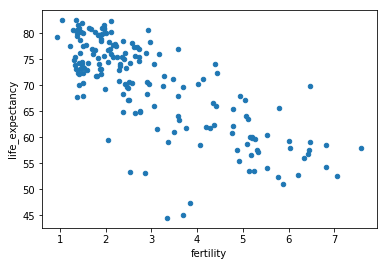

In [91]:
df.plot.scatter('fertility', 'life_expectancy')

**zad. 3** Zaimportuj `LinearRegression` z pakietu `sklearn.linear_model`.

Tworzymy obiekt modelu regresji liniowej.

In [95]:
model = LinearRegression()

Trening modelu ogranicza się do wywołania metodu `fit`, która przyjmuje dwa argumenty:

In [97]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Współczynniki modelu:

In [99]:
print("Wyraz wolny (bias):", model.intercept_)
print("Współczynniki cech:", model.coef_)

Wyraz wolny (bias): [82.92548061]
Współczynniki cech: [[-4.29315763]]


**zad. 4** Wytrenuj nowy model `model2`, który będzie jako X przyjmie kolumnę `gdp_log`. Wyświetl parametry nowego modelu.

Mając wytrenowany model możemy wykorzystać go do predykcji. Wystarczy wywołać metodę `predict`.

In [101]:
X_test = X[:5,:]
y_test = y[:5,:]
output = model.predict(X_test)

for i in range(5):
    print("input: {}\t predicted: {}\t expected: {}".format(X_test[i,0], output[i,0], y_test[i,0]))

input: 6.2	 predicted: 56.30790328839987	 expected: 52.8
input: 1.76	 predicted: 75.36952317631349	 expected: 76.8
input: 2.73	 predicted: 71.2051602728729	 expected: 75.5
input: 6.43	 predicted: 55.32047703294488	 expected: 56.7
input: 2.16	 predicted: 73.6522601233483	 expected: 75.5


## Sprawdzenie jakości modelu - metryki: $R^2$ i $MSE$

Istnieją 3 metryki, które określają jak dobry jest nasz model:
 * $R^2$: [Współczynnik determinacji](https://pl.wikipedia.org/wiki/Wsp%C3%B3%C5%82czynnik_determinacji)
 * $MSE$: [błąd średnio-kwadratowy](https://pl.wikipedia.org/wiki/B%C5%82%C4%85d_%C5%9Bredniokwadratowy) 
 * $RMSE = \sqrt{MSE}$

In [104]:
from sklearn.metrics import mean_squared_error

print("R^2: {}".format(model.score(X, y)))
rmse = np.sqrt(mean_squared_error(y, model.predict(X)))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5793180095847132
Root Mean Squared Error: 5.77824860865276


In [19]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.4881890528165924
Root Mean Squared Error: 5.889906845544505


## Regresja wielu zmiennych

Model regresji liniowej wielu zmiennych nie różni się istotnie od modelu jednej zmiennej. Np. chcąc zbudować model oparty o dwie kolumny: `fertility` i `gdp` wystarczy zmienić X (cechy wejściowe):

In [116]:


model_mv = LinearRegression()
model_mv.fit(X, y)

model_mv.score(X, y)

0.6421567875738732

**zad. 6**  Która kombinacja dwóch kolumn daje najlepszy wynik w metryce $R^2$? Tak jak poprzednio, próbujemy przewidzieć zawartosć kolumny `life_expectancy`.

Uwaga: Należy wyłączyć kolumnę `life_expectancy` spośród szukanych.

**zad. 7** 
 * Zbuduj model regresji liniowej, która oszacuje wartność kolumny `life_expectancy` na podstawie pozostałych kolumn.
 * Wyświetl współczynniki modelu? Dla jakich cech współczynniki modelu są bliskie 0? Dlaczego?
 * Oblicz wartości obu metryk na zbiorze trenującym.
 

**zad. 6**
Wykonaj jedno z zadań 6.1 lub 6.2.

**zad. 6.1** Zaimplementuj metrykę $R^2$ jako fukcję `r2` (szablon poniżej). Fukcja `r2` przyjmuje dwa parametry typu *list* i ma zwrócić wartość metryki $R^2$.

In [131]:
def r2(expected, predicted):
    """
    argumenty:
    expected (type: list): poprawne wartości
    predicted (type: list): oszacowanie z modelu
    """
    pass

y = df['life_expectancy'].values
X = df[['fertility', 'gdp']].values

test_model = LinearRegression()
test_model.fit(X, y)

print("Real R2:", test_model.score(X, y))

predicted = list(test_model.predict(X))
expected = list(y)

print("Calculated:", r2(expected, predicted))

Real R2: 0.6421567875738732
Calculated: None


 Zaimplementuj metrykę  $RMSE$  jako fukcję rmse (szablon poniżej). Fukcja rmse przyjmuje dwa parametry typu list i ma zwrócić wartość metryki  $RMSE$ .

In [133]:
def rmse(expected, predicted):
    """
    argumenty:
    expected (type: list): poprawne wartości
    predicted (type: list): oszacowanie z modelu
    """
    pass

y = df['life_expectancy'].values
X = df[['fertility', 'gdp']].values

test_model = LinearRegression()
test_model.fit(X, y)

print("Real R2:", np.sqrt(mean_squared_error(y, test_model.predict(X))))

predicted = list(test_model.predict(X))
expected = list(y)

print("Calculated:", r2(expected, predicted))

Real R2: 5.329244618514514
Calculated: None
